# Implementation Support Vector Machine

### Author: Sunwoo Choi

### Data
mnist from keras.datasets


In [ ]:
from keras.datasets import mnist
import numpy as np

(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Normalize the RGB colour from 0 to 1
train_X, test_X = train_X/255, test_X/255



11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_ava = train_X.reshape(train_X.shape[0], train_X.shape[1]* train_X.shape[2])
test_ava = test_X.reshape(test_X.shape[0], test_X.shape[1]* test_X.shape[2])

In [ ]:
train_img, train_label, test_img, test_label = [], [], [], []
for i in range(train_X.shape[0]):
  if train_y[i] == 1 or train_y[i] == 7:
    train_img.append(train_X[i])
    train_label.append(train_y[i])

for i in range(test_X.shape[0]):
  if test_y[i] == 1 or test_y[i] == 7:
    test_img.append(test_X[i])
    test_label.append(test_y[i])

# training sample, label, testing sample, label for one and seven
train_X17 = np.asarray(train_img)
train_y17 = np.asarray(train_label)
test_X17 = np.asarray(test_img)
test_y17 = np.asarray(test_label)


In [ ]:
# Reshaping traing set from (28 x 28) to (1 x 764)
train_X17 = train_X17.reshape(train_X17.shape[0], train_X17.shape[1]* train_X17.shape[2])
test_X17 = test_X17.reshape(test_X17.shape[0], test_X17.shape[1]* test_X17.shape[2])

In [ ]:
# All implemented models with keras are refereneced from https://keras.io/api/models/model/
# import libraries
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# If C parmeter that determines the sensitivity of model for outlier elements. 
# If C is high value, it becomes very sensitive to outlier which means that it is hard margine SVM

clf = svm.SVC(C=1e10, kernel='linear', probability=True)
clf.fit(train_X17,train_y17)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_predict = clf.predict(test_X17)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y17, y_predict))

Accuracy: 0.9916782246879334


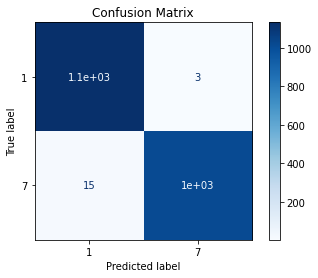

In [ ]:
# reference from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

disp = plot_confusion_matrix(clf, test_X17, test_y17,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

plt.show()

In [ ]:

# Change the C parameter which is relatively small parameters for soft margin 
cost = {'C':[0.01, 1, 10]}
clf_soft = svm.SVC(kernel='linear', probability=True)

# GridSearchCV returns the best performance model from the parameter varaiation
model=GridSearchCV(clf_soft,cost)
model.fit(train_X17,train_y17)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [0.01, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred=model.predict(test_X17)
print(f"The liner model accuracy: {metrics.accuracy_score(y_pred,test_y17)*100}%")

The model is 99.21405455386038% accurate


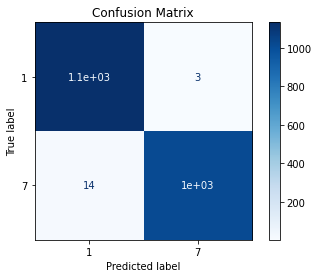

In [ ]:

disp = plot_confusion_matrix(model, test_X17, test_y17,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

plt.show()

In [ ]:
model.best_params_

{'C': 1}

when cost function parameter C is 1, it performs the best.
I will continue with this value for left of them

In [ ]:

# Since liner kernel only cares C parameter and we have C value, here I use only one model for linear kernel
clf_lin = svm.SVC(C=1, kernel= 'linear', probability=True)
clf_lin.fit(train_X17,train_y17)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
poly_para = {
    'degree' : [3,4,5]
}

# The model with polynomial kernel with degree of 3, 4, 5
clf_poly = svm.SVC(C=1, kernel= 'poly', probability=True)
model_poly = GridSearchCV(clf_poly, poly_para)
model_poly.fit(train_X17,train_y17)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None, param_grid={'degree': [3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
rbf_para = {
    'gamma' : [0.01, 0.1, 1]
}

# The model with Gaussian kernel with gamma of 0.01, 0.1, 1
clf_rbf = svm.SVC(C=1, kernel= 'rbf', probability=True)
model_rbf = GridSearchCV(clf_rbf, rbf_para)
model_rbf.fit(train_X17,train_y17)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.01, 0.1, 1]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [ ]:
y_pred_lin=clf_lin.predict(test_X17)
print(f"The linear model sccuracy: {metrics.accuracy_score(y_pred_lin,test_y17)*100}%")

y_pred_poly=model_poly.predict(test_X17)
print(f"The poly model accuracy: {metrics.accuracy_score(y_pred_poly,test_y17)*100}%")

y_pred_rbf=model_rbf.predict(test_X17)
print(f"The rbf model accuracy : {metrics.accuracy_score(y_pred_rbf,test_y17)*100}%")


The linear model sccuracy: 99.21405455386038%
The poly model accuracy: 99.44521497919555%
The rbf model accuracy : 99.53767914932963%


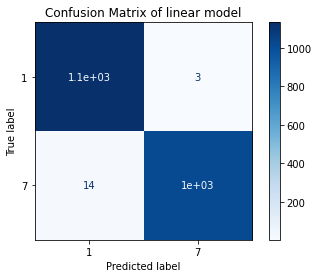

In [ ]:
disp = plot_confusion_matrix(clf_lin, test_X17, test_y17,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix of linear model")

plt.show()

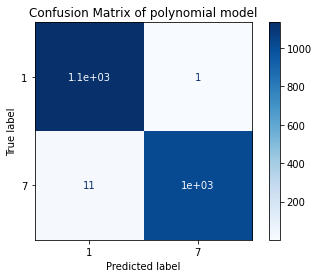

In [ ]:
disp = plot_confusion_matrix(model_poly, test_X17, test_y17,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix of polynomial model")

plt.show()

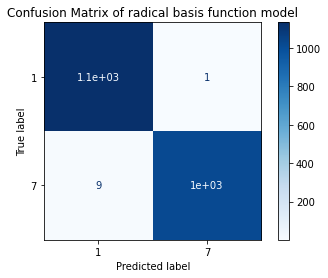

In [ ]:
disp = plot_confusion_matrix(model_rbf, test_X17, test_y17,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix of radical basis function model")

plt.show()

In [ ]:
model_rbf.best_params_

{'gamma': 0.01}

Since rbf model has the highest accuracy with 99.53767914932963%.

Linear model mispredicts total 17 testing samples.

Polynomial model mispredicts total 12 testing samples.

Rbf model mispreditcts total 10 testing samples.

The best performance parameter is 0.01 gamma.

In [ ]:
clf_ava = svm.SVC(C=1, kernel= 'rbf', probability=True, gamma=0.01)
clf_ava.fit(train_ava,train_y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred_ava=clf_ava.predict(test_ava)
print(f"The rbf model accuracy : {metrics.accuracy_score(y_pred_ava,test_y)*100}%")

The rbf model accuracy : 97.69%


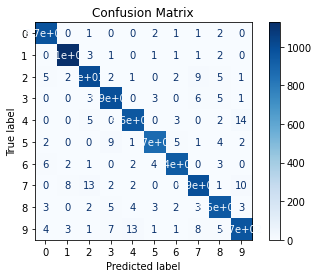

In [ ]:

disp = plot_confusion_matrix(clf_ava, test_ava, test_y,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

plt.show()